<h1> TRABALHO PRATICO INTEGRADOR </h1>

<h2> Taxa de rotatividade em telecomunicação </h2>

<h4> 1. Limpeza dos dados</h4>

<h5> 1.1 Importação</h5>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.tree import DecisionTreeClassifier

In [7]:
# Importando os dados

df = pd.read_csv(r"C:\Users\Diego\Downloads\taxa_rotatividade_telecom-main\taxa_rotatividade_telecom-main\data.csv")

# Removendo coluna ID para evitar redundancia 

df = df.drop(['id'], axis = 1)
df

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,279.782,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,145.062,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


<h5> 1.2 Exploração</h5>

Dicionário do dataset:
<ul>
<li>CIRCLE_ID: Área a qual o cliente pertence</li>
<li>LOC: Ligações locais - dentro da mesma área</li>
<li>STD: chamadas padrão - fora da área</li>
<li>IC: Chamadas recebidas</li>
<li>OG: Chamadas realizadas</li>
<li>T2T: Ligações entre mesma operadora (entre celulares)</li>
<li>T2M: Ligações entre outra operadora de celular</li>
<li>T2O: Ligações para outra operadora de linha fixa</li>
<li>T2F: Ligações para linha fixa da mesma operadora</li>
<li>T2C: Ligações para o próprio call center</li>
<li>ARPU: Receita média por cliente</li>
<li>MOU: Minutos de uso - chamadas de voz</li>
<li>AON: Tempo na operadora - número de dias que o cliente está usando a operadora</li>
<li>ONNET: Todos os tipos de chamadas dentro da mesma operadora</li>
<li>OFFNET: Todos os tipos de chamadas de fora da operadora</li>
<li>ROAM: Indica que o cliente está na zona de roaming (itinerância) durante a chamada</li>
<li>SPL: Chamadas especiais</li>
<li>ISD: Chamadas internacionais</li>
<li>RECH: Recarga</li>
<li>NUM: Número</li>
<li>AMT: Valor em moeda local</li>
<li>MAX: Máximo</li>
<li>DATA: Internet móvel</li>
<li>3G: Network 3G</li>
<li>AV: Média</li>
<li>VOL: Volume de uso da internet móvel (em MB)</li>
<li>2G: Network 2G</li>
<li>PCK: Serviços pré-pagos</li>
<li>NIGHT: Serviços somente noturnos</li>
<li>MONTHLY: Serviços com validade equivalente a um mês</li>
<li>SACHET: Serviços com validade menor que um mês</li>
<li>*.6: KPI relativo ao mês de junho</li>
<li>*.7: KPI relativo ao mês de julho</li>
<li>*.8: KPI relativo ao mês de agosto</li>
<li>FB_USER: Serviço de benefício ao uso do Facebook e outras redes sociais similares</li>
<li>VBC: Custo baseado em volume - quando nenhum serviço específico é adquirido e</li>
pago por uso 

    
</ul>

In [8]:
#Verificando a quantidade de linhas e colunas
df.shape

(69999, 171)

In [9]:
df.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=171)

In [10]:
#Descrição estatistica dos daods
df.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
# Informações Gerais do data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.3+ MB


In [12]:
#Verificando os valores nulos do data set
df.isnull().sum()

circle_id                 0
loc_og_t2o_mou          702
std_og_t2o_mou          702
loc_ic_t2o_mou          702
last_date_of_month_6      0
                       ... 
aon                       0
aug_vbc_3g                0
jul_vbc_3g                0
jun_vbc_3g                0
churn_probability         0
Length: 171, dtype: int64

In [13]:
#Checando a porcentagem de valores nulos ou ausentes de cada coluna
df_percent = df.isna().sum()/df.isna().count()*100
print(df_percent.to_string())

circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_m

<h5> 1.3 Limpeza</h5>

Para valores de recarga total, que são as variaveis com maior porcentagem de valeros nulos, podemos considerarar que esses valores são igual a zero, pois representa que não foi feita nenhuma recarga.


In [14]:
imput_nulos = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [15]:
df[imput_nulos] = df[imput_nulos].apply(lambda x: x.fillna(0))

In [16]:
#Verificando que os valores foram realmente substituidos
df[imput_nulos].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
dtype: int64

In [17]:
# Categorizando cada coluna por coluna de ID, coluna de data, coluna de categoria e coluna numérica

column_id = ['circle_id']

columns_date = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8']

columns_category = ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

columns_num = [column for column in df.columns if column not in column_id + columns_date + columns_category]

print("Colunas de Datas:%d\nColunas Numericas:%d\nColunas de categorias :%d" % (len(columns_date), len(columns_num), len(columns_category)))

# Verificando se classificamos todas as calunas

print(len(columns_date) + len(columns_num) + len(columns_category) + len(column_id) == df.shape[1])


Colunas de Datas:9
Colunas Numericas:155
Colunas de categorias :6
True


In [18]:
df[columns_date]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


Como datas específicas e o id da area não são dados relevantes vamos removê-los do data set

In [19]:
df = df.drop(column_id + columns_date, axis=1)
df.shape

# Talves a área possa sim ser relevante, pois alguns planos podem funcionar melhor em uma região e em outra não. Segue o codigo
# pra remover só a data. basta remover o "#"

#df = df.drop(columns_date, axis=1)
#df.shape

(69999, 161)

In [20]:
df[columns_category]

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
69994,NaN,0.0,0.0,NaN,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN
69997,0.0,0.0,0.0,1.0,1.0,1.0


In [21]:
#Substituindo os valores nulos na coluna de categoria por "-1"

# df[columns_category] = df[columns_category].apply(lambda x: x.fillna(-1))

#Podemos também substituir por "0" no lugar de "-1", o que implicaria que o usuario definitivamente não utilizava determinados serviços.
df[columns_category] = df[columns_category].apply(lambda x: x.fillna(0))
# basta remover o "#"

In [22]:
#Removendo variáveis com mais de 70% do valores nulos

initial_columns = df.shape[1]

#Para mudar a porcentagem limite basta mudar o "threshold", porém exite um padrão em que as featurea ou tem menos de 6% ou mais que
# 70% de seus valores nulos ou ausentes.

threshold = 0.7

include_columns = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < threshold else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_columns})
drop_missing.loc[drop_missing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True
159,jun_vbc_3g,True


In [23]:
df = df.loc[:, include_columns]
df.shape

(69999, 149)

In [24]:
# Substituindo o restante dos valores nulos pela mediana

columns_num = [column for column in df.columns if column not in column_id + columns_date + columns_category]

df[columns_num] = df[columns_num].apply(lambda x: x.fillna(x.median()))

#Substituindo pela média
#df[columns_num] = df[columns_num].apply(lambda x: x.fillna(x.mean()))

df[columns_num].isnull().sum()*100/df[columns_num].shape[0]

loc_og_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_ic_t2o_mou       0.0
arpu_6               0.0
arpu_7               0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 143, dtype: float64

In [25]:
#Verificando se ainda há valores nulos no dataset

features_missing = df.isnull().sum()*100/df.shape[0]
print (features_missing.to_string())

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In [26]:
df

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,0.0,1.0,0.0,710,0.00,0.00,0.00,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,0.0,0.0,0.0,882,0.00,0.00,0.00,0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,0.0,0.0,0.0,982,0.00,0.00,0.00,0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.0,0.0,0.0,15.760,410.924,329.136,0.00,7.36,10.93,0.00,...,1,0,0.0,1.0,1.0,221,0.00,0.00,0.00,0
69995,0.0,0.0,0.0,160.083,289.129,265.772,116.54,196.46,232.63,49.53,...,0,0,0.0,0.0,0.0,712,0.00,0.00,0.00,0
69996,0.0,0.0,0.0,372.088,258.374,279.782,77.13,68.44,78.44,335.54,...,0,0,0.0,0.0,0.0,879,0.00,0.00,0.00,0
69997,0.0,0.0,0.0,238.575,245.414,145.062,14.01,7.64,6.71,30.34,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


<h4> 2. Normalização e Divisão dos Dados</h4>

In [27]:
# os algoritmos de árvore não são muito afetados por escala, então para esses modelos não será necessário normalizar
# para outros tipos de algoritmos pode ser interessante

In [28]:
# divisão entre X e y, treino e teste
X = df.drop('churn_probability', axis='columns')
y = df['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [29]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
9837,0.0,0.0,0.0,403.836,911.569,506.455,167.38,680.61,652.14,41.31,...,0,0,0,0.0,1.0,0.0,749,0.00,19.25,0.00
147,0.0,0.0,0.0,3.743,127.810,204.280,34.11,19.18,42.76,96.48,...,0,0,0,0.0,0.0,0.0,446,0.00,0.00,0.00
56474,0.0,0.0,0.0,676.743,1647.724,928.831,300.49,470.96,239.18,380.33,...,0,0,0,0.0,0.0,0.0,493,0.00,0.00,0.00
48306,0.0,0.0,0.0,253.257,130.424,130.432,0.00,0.00,32.10,0.00,...,0,0,0,1.0,1.0,1.0,356,81.18,642.95,172.36
54485,0.0,0.0,0.0,130.442,0.000,130.442,0.00,0.00,0.00,0.00,...,0,0,0,1.0,0.0,1.0,241,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,0.0,0.0,0.0,0.000,0.000,142.213,0.00,0.00,117.68,0.05,...,0,0,0,0.0,0.0,0.0,188,0.00,0.00,0.00
30616,0.0,0.0,0.0,49.728,69.241,55.340,1.15,1.21,1.56,38.06,...,0,0,0,0.0,0.0,0.0,818,0.00,0.00,0.00
69671,0.0,0.0,0.0,58.402,378.307,135.753,13.08,7.56,0.21,34.69,...,0,0,0,0.0,1.0,1.0,1085,162.89,31.04,0.00
51304,0.0,0.0,0.0,3.750,56.696,94.103,0.00,13.39,45.58,0.46,...,0,0,0,0.0,0.0,0.0,514,0.00,0.00,0.00


<h4> 3. Modelos de Classificação</h4>

In [30]:
len(df.loc[df['churn_probability'] == 0])

62867

In [31]:
len(df.loc[df['churn_probability'] == 1])

7132

<h5> 3.1 Decision Tree Classifier</h5>

In [32]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test)

In [33]:
# assertividade inicial
accuracy_score(y_test, predictions_tree)

0.9068571428571428

In [34]:
cm = confusion_matrix(y_test, predictions_tree)
cm

array([[14932,   785],
       [  845,   938]], dtype=int64)

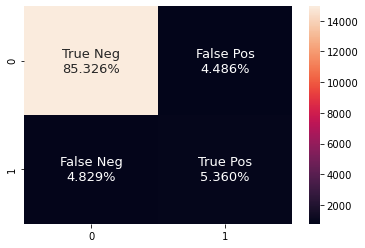

In [35]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, annot_kws={'fontsize':13}, fmt='');

In [36]:
# referência para usar na apresentação
# Precision – Of all the users that the algorithm predicts will churn, how many of them do actually churn?
# Recall – What percentage of users that end up churning does the algorithm successfully find?

# recall parece ser mais relevante para o caso que estamos lidando, pois nesse caso é melhor prevenir que possíveis cancelamentos ocorram
# porém as duas métricas são importantes

In [37]:
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15717
           1       0.54      0.53      0.54      1783

    accuracy                           0.91     17500
   macro avg       0.75      0.74      0.74     17500
weighted avg       0.91      0.91      0.91     17500



Apesar do alto valor de acurácia, o algoritmo não consegue prever muito bem os casos em que há possibilidade de churn.

<h5> 3.2 K-Nearest Neighbor</h5>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste do total de',y.shape[0],'dados.')

Há 52499 dados de treino e 17500 dados de teste do total de 69999 dados.


In [39]:
scaler = StandardScaler()
X_train_default = scaler.fit_transform(X_train)
X_test_default= scaler.transform(X_test) 

In [40]:
#validação cruzada
kf = KFold(n_splits = 5, 
           shuffle = True, 
           random_state = 12
          )

In [41]:
def knn_score(X_train,y_train):
    scores_para_df_standard = []

    for i in range(1, 21):
        model = KNeighborsClassifier(n_neighbors = i)

        cv_scores = cross_val_score(model, 
                                    X_train, 
                                    y_train, 
                                    cv = kf
                                )
        
        dict_row_score = {'score_medio':np.mean(cv_scores),
                        'score_std':np.std(cv_scores), 'n_neighbors' : i
                        }
        
        scores_para_df_standard.append(dict_row_score)
        
    return scores_para_df_standard

In [42]:
scores_para_df = []
scores_para_df = knn_score(X_train_default,y_train)
df_scores = pd.DataFrame(scores_para_df)
df_scores

,score_medio,score_std,n_neighbors
0,0.883236,0.002636,1
1,0.907655,0.002473,2
2,0.904532,0.002927,3
3,0.909579,0.001690,4
4,0.908722,0.002133,5
5,0.911141,0.002615,6
6,0.910094,0.002396,7
7,0.911522,0.002689,8
8,0.911084,0.002630,9
9,0.911598,0.002960,10


In [43]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.883236,0.002636,1,0.880600,0.885872
1,0.907655,0.002473,2,0.905182,0.910129
2,0.904532,0.002927,3,0.901604,0.907459
3,0.909579,0.001690,4,0.907890,0.911269
4,0.908722,0.002133,5,0.906589,0.910855


In [44]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 
                                'n_neighbors'].values[0]
best_k

18

In [45]:
def knn_best(X_train, y_train,X_test):
    knn = KNeighborsClassifier(n_neighbors = best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred


In [46]:
y_train_best_pred = knn_best(X_train_default, y_train, X_train_default)
y_test_best_pred = knn_best(X_train_default, y_train, X_test_default)

acc_train_model= accuracy_score(y_train, y_train_best_pred).round(5)
acc_test_model= accuracy_score(y_test, y_test_best_pred).round(5)

print("No modelo de  K=",best_k,"obtivemos a precisão",acc_train_model,"nos dados de treinamento e",acc_test_model,"nos dados de teste.")

No modelo de  K= 18 obtivemos a precisão 0.92059 nos dados de treinamento e 0.91297 nos dados de teste.


In [47]:
cm_knn = confusion_matrix(y_test, y_test_best_pred)
cm_knn

array([[15424,   284],
       [ 1239,   553]], dtype=int64)

<AxesSubplot:>

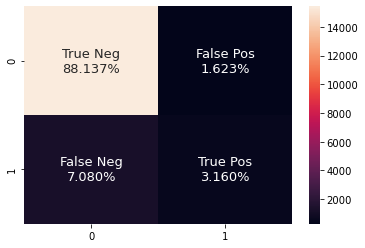

In [48]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm_knn.flatten() / np.sum(cm_knn)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_knn, annot=labels, annot_kws={'fontsize':13}, fmt='')

<h5> 3.3 Pycaret</h5>

In [49]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [108]:
from pycaret.classification import *
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

s = setup(train, target = 'churn_probability')
best = compare_models()
evaluate_model(best)
predictions = predict_model(best, data = test)
save_model(best, 'my_best_pipeline')

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.1.1. Support for newer scikit-learn versions will be added in a future release.

<h4> 4. Reajuste dos Modelos</h4>

<h5> 4.1 Decision Tree</h5>

In [51]:
# definir parâmetros para o Grid Search
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2,10)
}

In [52]:
# encontrar os melhores parâmetros para o modelo
grid_tree = GridSearchCV(model_tree,
                        param_grid=param_grid_tree)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [54]:
grid_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [55]:
# testar com os parâmetros encontrados
# {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

model_tree_tuned = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')
model_tree_tuned.fit(X_train, y_train)
predictions_tree_tuned = model_tree_tuned.predict(X_test)

In [56]:
accuracy_score(y_test, predictions_tree_tuned)

0.9425142857142857

In [57]:
cm = confusion_matrix(y_test, predictions_tree_tuned)
cm

array([[15375,   333],
       [  673,  1119]], dtype=int64)

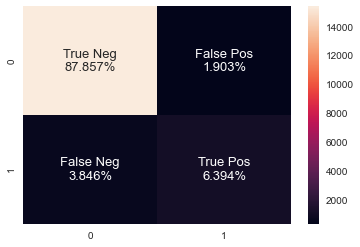

In [58]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, annot_kws={'fontsize':13}, fmt='');

In [59]:
print(classification_report(y_test, predictions_tree_tuned))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15708
           1       0.77      0.62      0.69      1792

    accuracy                           0.94     17500
   macro avg       0.86      0.80      0.83     17500
weighted avg       0.94      0.94      0.94     17500



## Resampling

In [81]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### OverSampling

In [91]:
oversample = RandomOverSampler(random_state=0)
X_resample, y_resample = oversample.fit_resample(X, y)

### UnderSampling

In [68]:
undersample = RandomUnderSampler(random_state=0)
X_resample, y_resample = undersample.fit_resample(X_resample, y_resample)

### Train Test Split

In [98]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, stratify=y_resample, random_state=42)

In [111]:
train_resample = X_train_resample.copy()
train_resample['churn_probability'] = y_train_resample

test_resample = X_test_resample.copy()
test_resample['churn_probability'] = y_test_resample

## Re-treino dos Modelos

In [ ]:
s = setup(train_resample, target = 'churn_probability')
best_recall = compare_models(sort='Recall')
evaluate_model(best_recall)
predictions = predict_model(best_recall, data = test_resample)
save_model(best_recall, 'my_best_pipeline_recall')

In [ ]:
print(best_recall)

In [ ]:
s = setup(train_resample, target = 'churn_probability')
best_f1 = compare_models(sort='F1')
evaluate_model(best_f1)
predictions = predict_model(best_f1, data = test_resample)
save_model(best_f1, 'my_best_pipeline_f1')

In [ ]:
print(best_f1)

In [ ]:
# treinar o melhor modelo de cada métrica, passando os parâmetros e features indicadas
# mostrar as métricas (matriz de confusão, classification report, accuracy score...)